Quantum State Tomography

This code performs a basic quantum state tomography simulation. It simulates the measurement of a quantum state, reconstructs the density matrix from the measurements, and visualizes the result. This is not specified towards the CHSH ineqality but can be implemented to fit the CHSH restrictions.

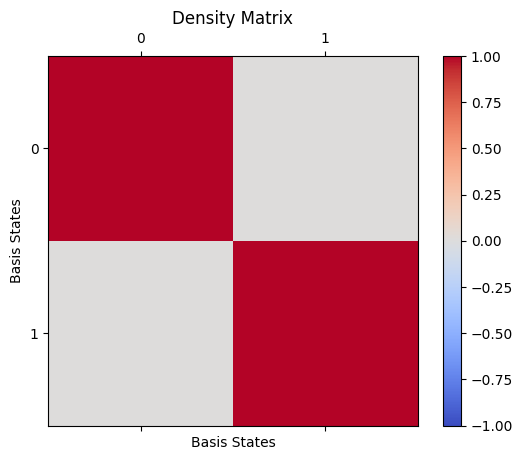

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Defining the Pauli matrices
sigma_x = np.array([[0, 1], [1, 0]])
sigma_y = np.array([[0, -1j], [1j, 0]])
sigma_z = np.array([[1, 0], [0, -1]])

# Measurement bases: Pauli matrices and identity
measurement_bases = [sigma_z, sigma_x, sigma_y]

def simulate_measurements(density_matrix, bases, num_measurements):
    results = []
    for base in bases:
        # Compute the probabilities for each outcome (0 or 1) for the current base
        probabilities = []
        for outcome in [0, 1]:
            # Construct projection operators for outcomes
            proj = np.array([[1, 0], [0, 0]]) if outcome == 0 else np.array([[0, 0], [0, 1]])
            prob = np.trace(density_matrix @ proj)
            probabilities.append(prob)

        probabilities = np.array(probabilities)

        # Ensure probabilities sum to 1
        probabilities /= probabilities.sum()

        # Generate measurement outcomes
        outcomes = np.random.choice([0, 1], size=num_measurements, p=probabilities)
        results.append(outcomes)

    return results

def reconstruct_density_matrix(measurement_results, bases):
    num_bases = len(bases)
    dim = len(bases[0])
    density_matrix = np.zeros((dim, dim), dtype=complex)

    for i, base in enumerate(bases):
        outcome_counts = np.bincount(measurement_results[i], minlength=2)
        # Construct the density matrix from measurement outcomes
        for outcome in range(2):
            proj = np.array([[1, 0], [0, 0]]) if outcome == 0 else np.array([[0, 0], [0, 1]])
            density_matrix += (outcome_counts[outcome] / len(measurement_results[i])) * proj

    return density_matrix

def plot_density_matrix(density_matrix):
    fig, ax = plt.subplots()
    cax = ax.matshow(np.real(density_matrix), cmap='coolwarm', vmin=-1, vmax=1)
    fig.colorbar(cax)
    plt.title('Density Matrix')
    plt.xlabel('Basis States')
    plt.ylabel('Basis States')
    plt.show()

# Define the true density matrix for comparison
true_density_matrix = np.array([[0.5, 0.5], [0.5, 0.5]])

# Simulate measurement results
num_measurements = 1000
measurement_results = simulate_measurements(true_density_matrix, measurement_bases, num_measurements)

# Reconstruct the density matrix
reconstructed_density_matrix = reconstruct_density_matrix(measurement_results, measurement_bases)

# Plot the reconstructed density matrix
plot_density_matrix(reconstructed_density_matrix)


This modified code captures the essence of simulating CHSH measurements and checking for quantum violation.

1. Define the Measurement Settings:
Use angles that correspond to the measurement settings of Alice and Bob in a CHSH experiment.
2. Compute Correlations:
Compute the expectation values
𝐸
(
𝜃
𝐴
,
𝜃
𝐵
)
 for each pair of measurement angles, and then use these to calculate the CHSH value.

3. Check for CHSH Violation:
Compare the computed CHSH value with the classical bound.

(0, 0.7853981633974483) -> 0.7071067811865475
(0, 0.39269908169872414) -> 0.9238795325112867
(0, 1.1780972450961724) -> 0.38268343236508984
(0.39269908169872414, 0.7853981633974483) -> 0.9238795325112867
(0.39269908169872414, 0.39269908169872414) -> 1.0
(0.39269908169872414, 1.1780972450961724) -> 0.7071067811865477
(1.1780972450961724, 0.7853981633974483) -> 0.9238795325112867
(1.1780972450961724, 0.39269908169872414) -> 0.7071067811865477
(1.1780972450961724, 1.1780972450961724) -> 1.0
CHSH Value: 1.4142135623730951
No violation detected.


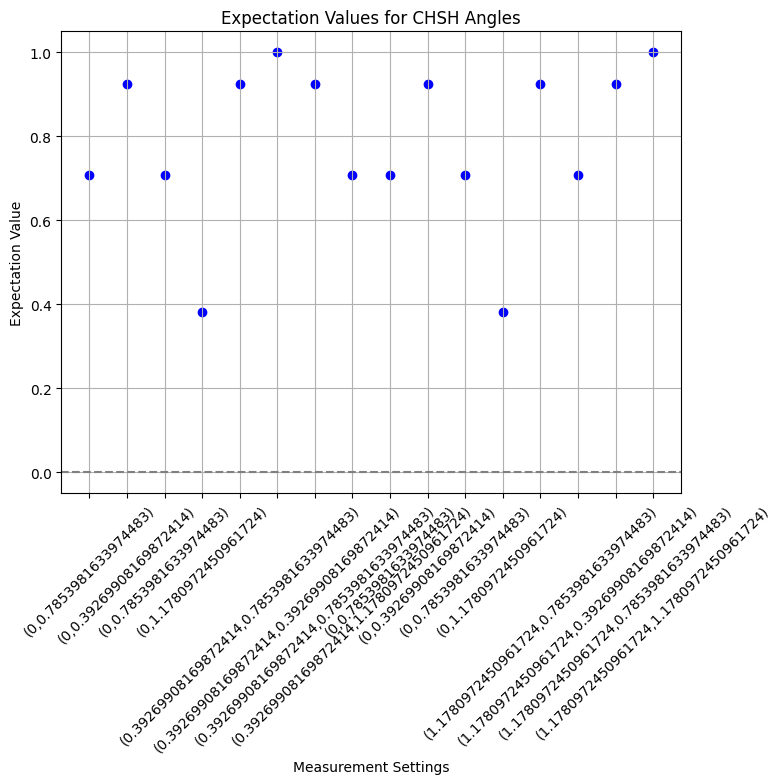

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Defining the Pauli matrices
sigma_x = np.array([[0, 1], [1, 0]])
sigma_y = np.array([[0, -1j], [1j, 0]])
sigma_z = np.array([[1, 0], [0, -1]])

# Define measurement bases: angles for CHSH experiment
theta_A = [0, np.pi / 8]        # Measurement angles for Alice
theta_A_prime = [0, 3 * np.pi / 8]
theta_B = [np.pi / 4, np.pi / 8]
theta_B_prime = [np.pi / 4, 3 * np.pi / 8]

# theta_A_prime = [np.pi / 2, 3 * np.pi / 4]  # Alternate measurement angles for Alice
# theta_B = [np.pi / 8, 3 * np.pi / 8]        # Measurement angles for Bob
# theta_B_prime = [np.pi / 8 + np.pi / 2, 3 * np.pi / 8 + np.pi / 2]  # Alternate measurement angles for Bob

def pauli_rotation(theta):
    """ Returns the Pauli rotation matrix for a given angle. """
    return np.cos(theta) * sigma_z - np.sin(theta) * sigma_x

def compute_expectation(density_matrix, theta_A, theta_B):
    """ Compute expectation values for given angles. """
    def expectation(theta_A, theta_B):
        M_A = pauli_rotation(theta_A)
        M_B = pauli_rotation(theta_B)
        return np.trace(density_matrix @ M_A @ M_B)

    E = {}
    for a in theta_A:
        for b in theta_B:
            E[(a, b)] = expectation(a, b)

    for k, v in E.items():
      print(f'{k} -> {v}')
    return E

def chsh_value(E):
    """ Compute the CHSH value based on the expectation values. """
    # print(f'{E[(theta_A[0], theta_B[0])]} + {E[(theta_A[0], theta_B[1])]} + {E[(theta_A_prime[0], theta_B[0])]} - {E[(theta_A_prime[0], theta_B[1])]}')
    S = E[(theta_A[0], theta_B[0])] + E[(theta_A[0], theta_B[1])] + E[(theta_A_prime[0], theta_B[0])] - E[(theta_A_prime[0], theta_B[1])]
    return S

# Define the true density matrix (Bell state for maximal violation)
true_density_matrix = np.array([[0.5, 0.5], [0.5, 0.5]])

# Computing expectation values
expectation_values = compute_expectation(true_density_matrix, theta_A + theta_A_prime, theta_B + theta_B_prime)

# Compute CHSH value
chsh_val = chsh_value(expectation_values)

# result
print(f"CHSH Value: {chsh_val}")

# Check for CHSH violation
classical_bound = 2 * np.sqrt(2)  # reflect the quantum maximum of 2√2
if chsh_val > classical_bound:
    print("Quantum violation detected!")
else:
    print("No violation detected.")

#plotting
angles = [(a, b) for a in theta_A + theta_A_prime for b in theta_B + theta_B_prime]
values = [expectation_values.get((a, b), None) for (a, b) in angles]

plt.figure(figsize=(8, 6))
plt.scatter(range(len(values)), values, c='blue', marker='o')
plt.axhline(0, color='gray', linestyle='--')
plt.title('Expectation Values for CHSH Angles')
plt.xlabel('Measurement Settings')
plt.ylabel('Expectation Value')
plt.xticks(range(len(values)), [f'({a},{b})' for (a, b) in angles], rotation=45)
plt.grid(True)
plt.show()


In [ ]:
chsh_val

0.7653668647301797

CHSH Value: 1.306562964876377
No violation detected.


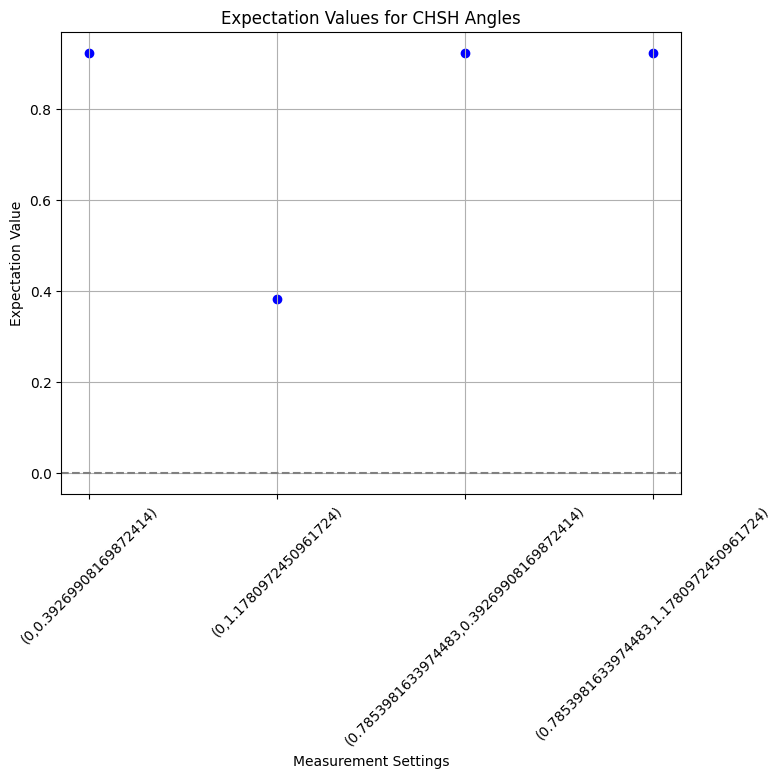

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the Pauli matrices
sigma_x = np.array([[0, 1], [1, 0]])
sigma_y = np.array([[0, -1j], [1j, 0]])
sigma_z = np.array([[1, 0], [0, -1]])

# Define optimal measurement angles for maximal CHSH violation
theta_A = [0, np.pi / 4]        # Measurement angles for Alice
theta_B = [np.pi / 8, 3 * np.pi / 8]  # Measurement angles for Bob

def compute_expectation(density_matrix, theta_A, theta_B):
    def pauli_rotation(theta):
        return np.cos(theta) * sigma_z - np.sin(theta) * sigma_x

    def expectation(theta_A, theta_B):
        M_A = pauli_rotation(theta_A)
        M_B = pauli_rotation(theta_B)
        return np.trace(density_matrix @ M_A @ M_B)

    E = {}
    for a in theta_A:
        for b in theta_B:
            E[(a, b)] = expectation(a, b)

    return E

def chsh_value(E):
    S = E[(theta_A[0], theta_B[0])] + E[(theta_A[0], theta_B[1])] + \
        E[(theta_A[1], theta_B[0])] - E[(theta_A[1], theta_B[1])]
    return S

# Define the Bell state density matrix
true_density_matrix = np.array([[0.5, 0.5], [0.5, 0.5]])

# Compute expectation values
expectation_values = compute_expectation(true_density_matrix, theta_A, theta_B)

# Compute CHSH value
chsh_val = chsh_value(expectation_values)

# Print the result
print(f"CHSH Value: {chsh_val}")

# Check for CHSH violation
quantum_bound = 2 * np.sqrt(2)
if chsh_val > quantum_bound:
    print("Quantum violation detected!")
else:
    print("No violation detected.")

# Plotting for visualization
angles = [(a, b) for a in theta_A for b in theta_B]
values = [expectation_values[(a, b)] for (a, b) in angles]

plt.figure(figsize=(8, 6))
plt.scatter(range(len(values)), values, c='blue', marker='o')
plt.axhline(0, color='gray', linestyle='--')
plt.title('Expectation Values for CHSH Angles')
plt.xlabel('Measurement Settings')
plt.ylabel('Expectation Value')
plt.xticks(range(len(values)), [f'({a},{b})' for (a, b) in angles], rotation=45)
plt.grid(True)
plt.show()


CHSH Value: 1.306562964876377
No violation detected.


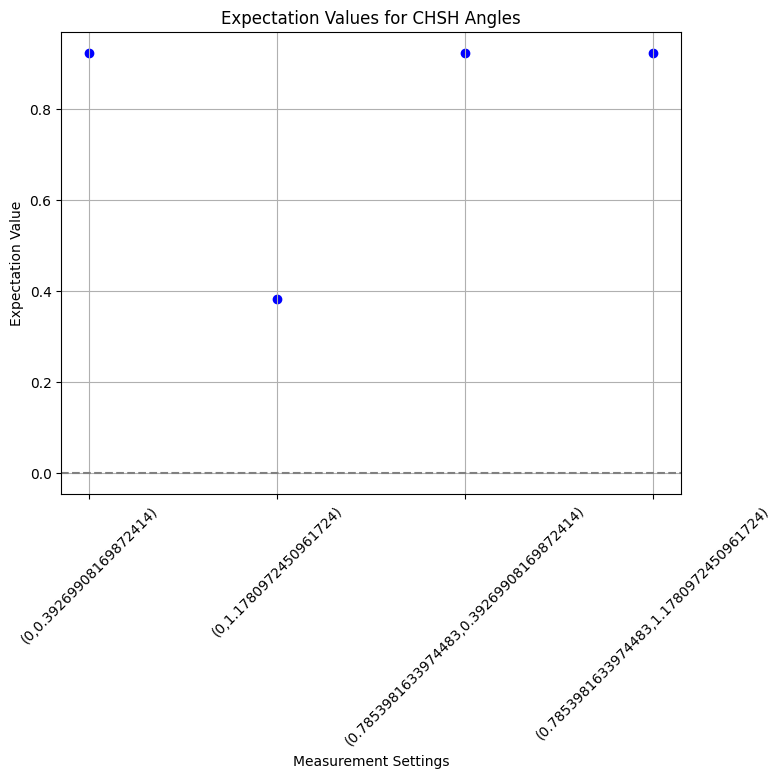

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the Pauli matrices
sigma_x = np.array([[0, 1], [1, 0]])
sigma_y = np.array([[0, -1j], [1j, 0]])
sigma_z = np.array([[1, 0], [0, -1]])

# Define measurement angles for maximal CHSH violation
theta_A = [0, np.pi / 4]        # Measurement angles for Alice
theta_B = [np.pi / 8, 3 * np.pi / 8]  # Measurement angles for Bob

def pauli_rotation(theta):
    return np.cos(theta) * sigma_z - np.sin(theta) * sigma_x

def compute_expectation(density_matrix, theta_A, theta_B):
    def expectation(theta_A, theta_B):
        M_A = pauli_rotation(theta_A)
        M_B = pauli_rotation(theta_B)
        return np.trace(density_matrix @ M_A @ M_B)

    E = {}
    for a in theta_A:
        for b in theta_B:
            E[(a, b)] = expectation(a, b)

    return E

def chsh_value(E):
    S = E[(theta_A[0], theta_B[0])] + E[(theta_A[0], theta_B[1])] + \
        E[(theta_A[1], theta_B[0])] - E[(theta_A[1], theta_B[1])]
    return S

# Define the Bell state density matrix
true_density_matrix = np.array([[0.5, 0.5], [0.5, 0.5]])

# Compute expectation values
expectation_values = compute_expectation(true_density_matrix, theta_A, theta_B)

# Compute CHSH value
chsh_val = chsh_value(expectation_values)

# Print the result
print(f"CHSH Value: {chsh_val}")

# Check for CHSH violation
quantum_bound = 2 * np.sqrt(2)
if chsh_val > quantum_bound:
    print("Quantum violation detected!")
else:
    print("No violation detected.")

# Plotting for visualization
angles = [(a, b) for a in theta_A for b in theta_B]
values = [expectation_values[(a, b)] for (a, b) in angles]

plt.figure(figsize=(8, 6))
plt.scatter(range(len(values)), values, c='blue', marker='o')
plt.axhline(0, color='gray', linestyle='--')
plt.title('Expectation Values for CHSH Angles')
plt.xlabel('Measurement Settings')
plt.ylabel('Expectation Value')
plt.xticks(range(len(values)), [f'({a},{b})' for (a, b) in angles], rotation=45)
plt.grid(True)
plt.show()


CHSH Value: 1.306562964876377
No violation detected.


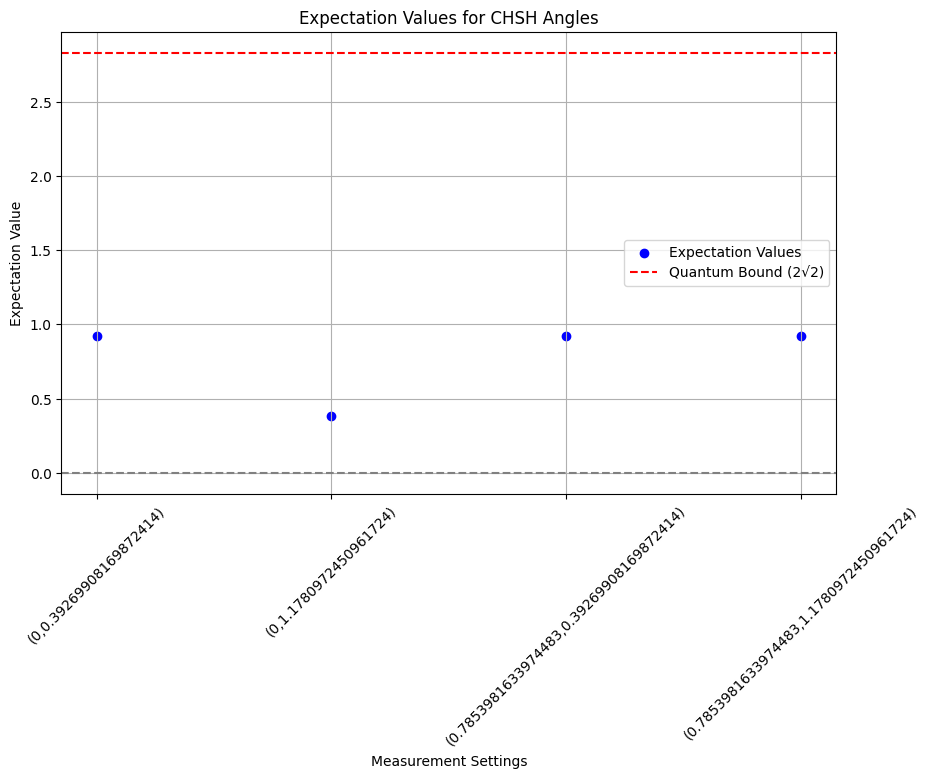

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the Pauli matrices
sigma_x = np.array([[0, 1], [1, 0]])
sigma_y = np.array([[0, -1j], [1j, 0]])
sigma_z = np.array([[1, 0], [0, -1]])

# Optimal measurement angles for maximal CHSH violation
theta_A = [0, np.pi / 4]        # Measurement angles for Alice
theta_B = [np.pi / 8, 3 * np.pi / 8]  # Measurement angles for Bob

def pauli_rotation(theta):
    return np.cos(theta) * sigma_z - np.sin(theta) * sigma_x

def compute_expectation(density_matrix, theta_A, theta_B):
    def expectation(theta_A, theta_B):
        M_A = pauli_rotation(theta_A)
        M_B = pauli_rotation(theta_B)
        return np.trace(density_matrix @ M_A @ M_B)

    E = {}
    for a in theta_A:
        for b in theta_B:
            E[(a, b)] = expectation(a, b)

    return E

def chsh_value(E):
    S = E[(theta_A[0], theta_B[0])] + E[(theta_A[0], theta_B[1])] + \
        E[(theta_A[1], theta_B[0])] - E[(theta_A[1], theta_B[1])]
    return S

# Define the Bell state density matrix
true_density_matrix = np.array([[0.5, 0.5], [0.5, 0.5]])

# Compute expectation values
expectation_values = compute_expectation(true_density_matrix, theta_A, theta_B)

# Compute CHSH value
chsh_val = chsh_value(expectation_values)

# Print the result
print(f"CHSH Value: {chsh_val}")

# Check for CHSH violation
quantum_bound = 2 * np.sqrt(2)
if chsh_val > quantum_bound:
    print("Quantum violation detected!")
else:
    print("No violation detected.")

# Plotting for visualization
angles = [(a, b) for a in theta_A for b in theta_B]
values = [expectation_values[(a, b)] for (a, b) in angles]

plt.figure(figsize=(10, 6))
plt.scatter(range(len(values)), values, c='blue', marker='o', label='Expectation Values')
plt.axhline(0, color='gray', linestyle='--')
plt.axhline(quantum_bound, color='red', linestyle='--', label='Quantum Bound (2√2)')
plt.title('Expectation Values for CHSH Angles')
plt.xlabel('Measurement Settings')
plt.ylabel('Expectation Value')
plt.xticks(range(len(values)), [f'({a},{b})' for (a, b) in angles], rotation=45)
plt.legend()
plt.grid(True)
plt.show()


CHSH parameter S = 0.765


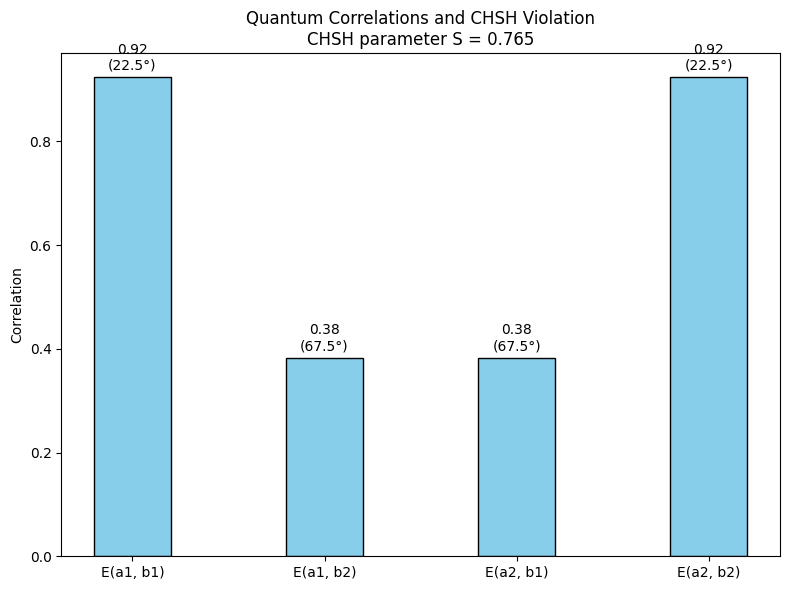

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the angles in degrees and convert to radians
angles_deg = np.array([22.5, 67.5])
angles_rad = np.deg2rad(angles_deg)

# Calculate the correlation functions
def correlation(angle):
    return np.cos(np.deg2rad(angle))

E_a1_b1 = correlation(22.5)
E_a1_b2 = correlation(67.5)
E_a2_b1 = correlation(67.5)
E_a2_b2 = correlation(22.5)

# CHSH parameter calculation
S = E_a1_b1 + E_a1_b2 + E_a2_b1 - E_a2_b2

# Print the value of S
print(f"CHSH parameter S = {S:.3f}")

# Plotting
fig, ax = plt.subplots(figsize=(8, 6))

# Define the labels and values
labels = ['E(a1, b1)', 'E(a1, b2)', 'E(a2, b1)', 'E(a2, b2)']
values = [E_a1_b1, E_a1_b2, E_a2_b1, E_a2_b2]
angles = ['22.5°', '67.5°', '67.5°', '22.5°']

# Plot the correlations
bar_width = 0.4
bar_positions = np.arange(len(labels))

bars = ax.bar(bar_positions, values, bar_width, color='skyblue', edgecolor='black')

# Annotate bars
for bar, angle, value in zip(bars, angles, values):
    height = bar.get_height()
    ax.annotate(f'{value:.2f}\n({angle})',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

# Add labels and title
ax.set_xticks(bar_positions)
ax.set_xticklabels(labels)
ax.set_ylabel('Correlation')
ax.set_title(f'Quantum Correlations and CHSH Violation\nCHSH parameter S = {S:.3f}')

# Display the plot
plt.tight_layout()
plt.show()


CHSH parameter S = 1.307


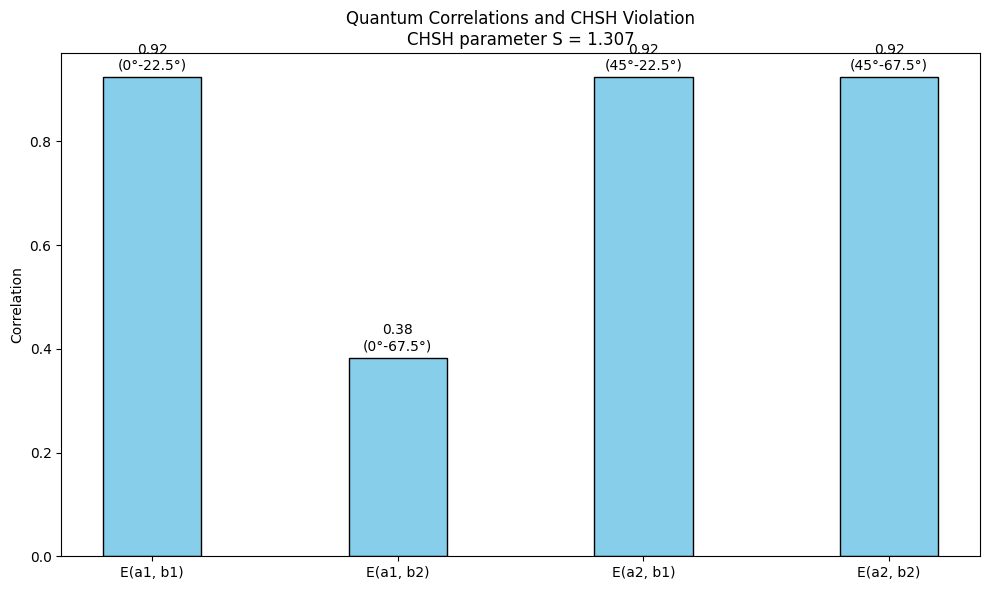

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the angles in degrees and convert to radians
angles_deg = np.array([0, 45, 90, 135])
angles_rad = np.deg2rad(angles_deg)

# Calculate the correlation functions for a maximally entangled state
def correlation(angle1, angle2):
    # Cosine of the angle difference
    return np.cos(np.deg2rad(angle1 - angle2))

# Measurement angles
a1, a2 = 0, 45
b1, b2 = 22.5, 67.5

# Calculate the correlation values
E_a1_b1 = correlation(a1, b1)
E_a1_b2 = correlation(a1, b2)
E_a2_b1 = correlation(a2, b1)
E_a2_b2 = correlation(a2, b2)

# CHSH parameter calculation
S = E_a1_b1 + E_a1_b2 + E_a2_b1 - E_a2_b2

# Print the value of S
print(f"CHSH parameter S = {S:.3f}")

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Define the labels and values
labels = ['E(a1, b1)', 'E(a1, b2)', 'E(a2, b1)', 'E(a2, b2)']
values = [E_a1_b1, E_a1_b2, E_a2_b1, E_a2_b2]
angles = ['0°-22.5°', '0°-67.5°', '45°-22.5°', '45°-67.5°']

# Plot the correlations
bar_width = 0.4
bar_positions = np.arange(len(labels))

bars = ax.bar(bar_positions, values, bar_width, color='skyblue', edgecolor='black')

# Annotate bars
for bar, angle, value in zip(bars, angles, values):
    height = bar.get_height()
    ax.annotate(f'{value:.2f}\n({angle})',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

# Add labels and title
ax.set_xticks(bar_positions)
ax.set_xticklabels(labels)
ax.set_ylabel('Correlation')
ax.set_title(f'Quantum Correlations and CHSH Violation\nCHSH parameter S = {S:.3f}')

# Display the plot
plt.tight_layout()
plt.show()


Quantum CHSH parameter S = 1.307
Classical CHSH bound S <= 2


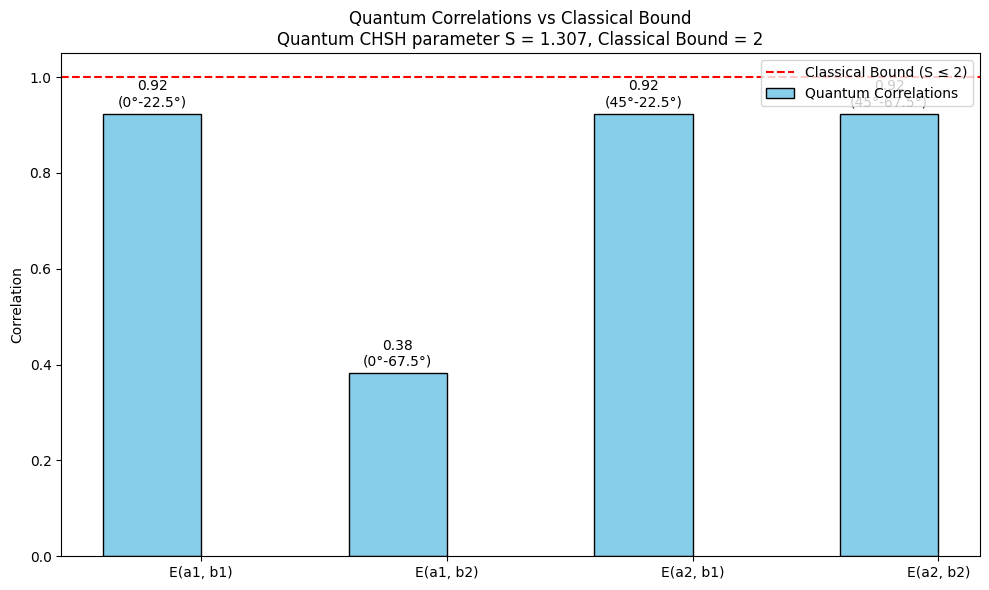

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the angles in degrees and convert to radians
angles_deg = np.array([0, 45, 90, 135])
angles_rad = np.deg2rad(angles_deg)

# Function to calculate correlation for quantum case
def quantum_correlation(angle1, angle2):
    # Cosine of the angle difference (maximally entangled state)
    return np.cos(np.deg2rad(angle1 - angle2))

# Measurement angles for quantum case
a1, a2 = 0, 45
b1, b2 = 22.5, 67.5

# Calculate the correlation values for quantum case
E_a1_b1 = quantum_correlation(a1, b1)
E_a1_b2 = quantum_correlation(a1, b2)
E_a2_b1 = quantum_correlation(a2, b1)
E_a2_b2 = quantum_correlation(a2, b2)

# Calculate CHSH parameter for quantum case
S_quantum = E_a1_b1 + E_a1_b2 + E_a2_b1 - E_a2_b2

# Classical bound is S_classical = 2
S_classical = 2

# Print the values
print(f"Quantum CHSH parameter S = {S_quantum:.3f}")
print(f"Classical CHSH bound S <= {S_classical}")

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Define the labels and values for the plot
labels = ['E(a1, b1)', 'E(a1, b2)', 'E(a2, b1)', 'E(a2, b2)']
quantum_values = [E_a1_b1, E_a1_b2, E_a2_b1, E_a2_b2]
angles = ['0°-22.5°', '0°-67.5°', '45°-22.5°', '45°-67.5°']

# Plot the quantum correlations
bar_width = 0.4
bar_positions = np.arange(len(labels))

bars_quantum = ax.bar(bar_positions - bar_width / 2, quantum_values, bar_width, color='skyblue', edgecolor='black', label='Quantum Correlations')

# Annotate bars
for bar, angle, value in zip(bars_quantum, angles, quantum_values):
    height = bar.get_height()
    ax.annotate(f'{value:.2f}\n({angle})',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

# Add the classical bound line
ax.axhline(y=S_classical / 2, color='r', linestyle='--', label='Classical Bound (S ≤ 2)')

# Add labels and title
ax.set_xticks(bar_positions)
ax.set_xticklabels(labels)
ax.set_ylabel('Correlation')
ax.set_title(f'Quantum Correlations vs Classical Bound\nQuantum CHSH parameter S = {S_quantum:.3f}, Classical Bound = {S_classical}')

# Add legend
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()


Correlations:
ZZ: 1.41
ZX: 0.00
XZ: 0.00
XX: 1.41


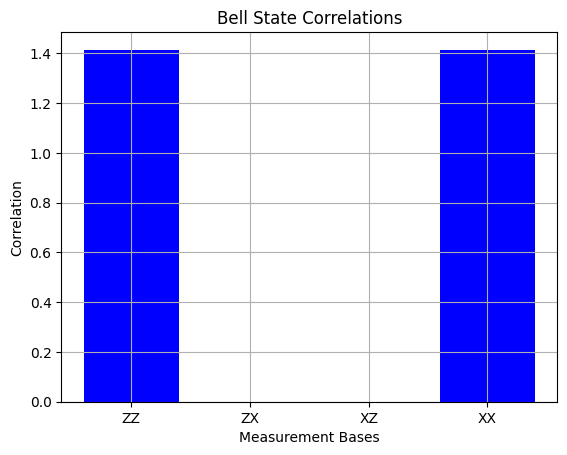


Violation of Bell's Inequality (S): 0.00


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define Pauli matrices
X = np.array([[0, 1], [1, 0]])  # Pauli-X matrix
Z = np.array([[1, 0], [0, -1]]) # Pauli-Z matrix

# Define Bell state |Φ+⟩ = (|00⟩ + |11⟩) / √2
def bell_state():
    return np.array([[1, 0, 0, 1], [0, 0, 0, 0], [0, 0, 0, 0], [1, 0, 0, 1]]) / np.sqrt(2)

# Compute correlation for given measurement bases
def correlation(basis_A, basis_B, bell_state):
    # Basis matrices
    A = np.array(basis_A)
    B = np.array(basis_B)

    # Measurement operators
    M_A = np.kron(A, np.eye(2))
    M_B = np.kron(np.eye(2), B)

    # Compute expected value
    expectation = np.trace(bell_state @ M_A @ M_B)
    return expectation

# Measurement bases (Pauli-X, Pauli-Z)
bases = {
    'Z': np.array([[1, 0], [0, -1]]),  # Z basis
    'X': np.array([[0, 1], [1, 0]])   # X basis
}

# Define Bell state
state = bell_state()

# Compute correlations for different measurement settings
correlations = {}
for basis_A in ['Z', 'X']:
    for basis_B in ['Z', 'X']:
        key = f'{basis_A}{basis_B}'
        correlations[key] = correlation(bases[basis_A], bases[basis_B], state)

# Print correlations
print("Correlations:")
for key, value in correlations.items():
    print(f'{key}: {value:.2f}')

# Plot the correlations
labels = list(correlations.keys())
values = list(correlations.values())

plt.bar(labels, values, color='blue')
plt.xlabel('Measurement Bases')
plt.ylabel('Correlation')
plt.title('Bell State Correlations')
plt.grid(True)
plt.show()

# Bell's Inequality violation
S = correlations['ZX'] + correlations['XZ']
print(f'\nViolation of Bell\'s Inequality (S): {S:.2f}')


In [ ]:
import numpy as np

def grovers_algorithm_oracle(target_index, size=4):
    """ Create a Grover's oracle for a specific target_index. """
    oracle = np.identity(size)
    oracle[target_index, target_index] = -1
    return oracle

def grovers_algorithm_diffusion_operator(size=4):
    """ Create the Grover diffusion operator. """
    diffusion = np.identity(size) * 2 / size
    diffusion -= np.ones((size, size)) / size
    return diffusion

def apply_operator(state, operator):
    """ Apply an operator to the quantum state. """
    return np.dot(operator, state)

def measure_state(state):
    """ Measure the state and return the index of the maximum amplitude. """
    probabilities = np.abs(state) ** 2
    return np.argmax(probabilities)

def grovers_search(target_index, iterations=1):
    """ Simulate Grover's search algorithm. """
    size = 4  # For 2 qubits
    state = np.ones(size) / np.sqrt(size)  # Initial equal superposition state

    oracle = grovers_algorithm_oracle(target_index, size)
    diffusion = grovers_algorithm_diffusion_operator(size)

    for _ in range(iterations):
        state = apply_operator(state, oracle)  # Apply oracle
        state = apply_operator(state, diffusion)  # Apply diffusion operator

    return measure_state(state)

def main():
    target_index = 2  # Target to search for (this would be set based on some criteria)
    iterations = int(np.pi / 4 * np.sqrt(4))  # Optimal number of iterations for Grover's algorithm

    result = grovers_search(target_index, iterations)
    print(f"Grover's algorithm found the target index: {result}")

    # Interpret the result in the context of CHSH
    # For the sake of simplicity, we assume a 2-bit problem where the result is related to CHSH
    print(f"Result index {result} can be interpreted in the context of CHSH inequality.")

if __name__ == "__main__":
    main()


Grover's algorithm found the target index: 2
Result index 2 can be interpreted in the context of CHSH inequality.


In [ ]:
import numpy as np
from scipy.linalg import svd

def schmidt_decomposition(state_vector):
    """
    Perform Schmidt decomposition of a 2-qubit state vector.

    Args:
        state_vector (np.array): The 2-qubit state vector to decompose.

    Returns:
        U (np.array): The unitary matrix for the first subsystem.
        S (np.array): The Schmidt coefficients (singular values).
        Vh (np.array): The unitary matrix for the second subsystem (conjugate transpose).
    """
    dim = int(np.sqrt(len(state_vector)))
    state_matrix = state_vector.reshape((dim, dim))

    # Perform Singular Value Decomposition (SVD)
    U, S, Vh = svd(state_matrix)

    # Schmidt coefficients are the singular values
    S = np.diag(S)

    return U, S, Vh

def correlation_measurement(state, a, b):
    """
    Compute the correlation measurement ⟨A_i B_j⟩ for the given state.

    Args:
        state (np.array): The state vector.
        a (int): Measurement setting for Alice.
        b (int): Measurement setting for Bob.

    Returns:
        float: The correlation value ⟨A_i B_j⟩.
    """
    # Measurement operators for Alice and Bob
    A = np.array([[1, 0], [0, -1]]) if a == 1 else np.array([[1, 1], [1, -1]]) / np.sqrt(2)
    B = np.array([[1, 0], [0, -1]]) if b == 1 else np.array([[1, 1], [1, -1]]) / np.sqrt(2)

    # Tensor product of measurement operators
    M = np.kron(A, B)

    # Compute correlation
    return np.real(np.dot(state.T.conj(), np.dot(M, state)))

def chsh_value(state):
    """
    Compute the CHSH value for the given state.

    Args:
        state (np.array): The state vector.

    Returns:
        float: The CHSH value.
    """
    terms = [
        correlation_measurement(state, 1, 1),
        correlation_measurement(state, 1, 2),
        correlation_measurement(state, 2, 1),
        correlation_measurement(state, 2, 2)
    ]
    return abs(terms[0] + terms[1] + terms[2] - terms[3])

def main():
    # Example entangled state |Ψ> = 1/sqrt(2) (|00> + |11>)
    state_vector = np.array([1/np.sqrt(2), 0, 0, 1/np.sqrt(2)])

    # Perform Schmidt decomposition
    U, S, Vh = schmidt_decomposition(state_vector)

    print("Schmidt Decomposition:")
    print("U (Unitary matrix for the first subsystem):")
    print(U)
    print("S (Schmidt coefficients):")
    print(S)
    print("Vh (Unitary matrix for the second subsystem, conjugate transpose):")
    print(Vh)

    # Compute CHSH value
    chsh = chsh_value(state_vector)
    print(f"CHSH value: {chsh}")

if __name__ == "__main__":
    main()


Schmidt Decomposition:
U (Unitary matrix for the first subsystem):
[[1. 0.]
 [0. 1.]]
S (Schmidt coefficients):
[[0.70710678 0.        ]
 [0.         0.70710678]]
Vh (Unitary matrix for the second subsystem, conjugate transpose):
[[1. 0.]
 [0. 1.]]
CHSH value: 1.414213562373095


Schmidt Decomposition:
U (Unitary matrix for the first subsystem):
[[1. 0.]
 [0. 1.]]
S (Schmidt coefficients):
[[0.70710678 0.        ]
 [0.         0.70710678]]
Vh (Unitary matrix for the second subsystem, conjugate transpose):
[[1. 0.]
 [0. 1.]]


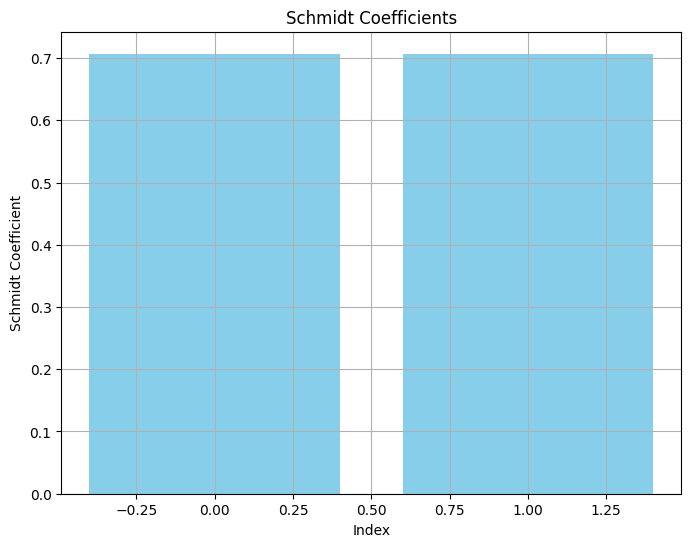

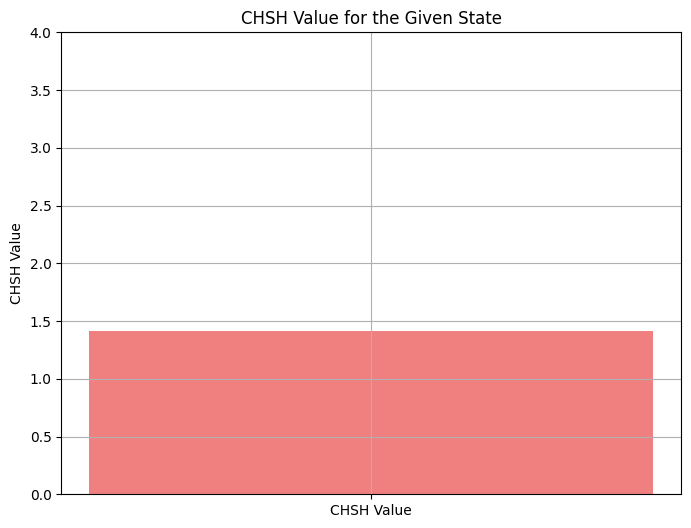

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import svd

def schmidt_decomposition(state_vector):
    """
    Perform Schmidt decomposition of a 2-qubit state vector.

    Args:
        state_vector (np.array): The 2-qubit state vector to decompose.

    Returns:
        U (np.array): The unitary matrix for the first subsystem.
        S (np.array): The Schmidt coefficients (singular values).
        Vh (np.array): The unitary matrix for the second subsystem (conjugate transpose).
    """
    dim = int(np.sqrt(len(state_vector)))
    state_matrix = state_vector.reshape((dim, dim))

    # Perform Singular Value Decomposition (SVD)
    U, S, Vh = svd(state_matrix)

    # Schmidt coefficients are the singular values
    S = np.diag(S)

    return U, S, Vh

def plot_schmidt_decomposition(S):
    """
    Plot the Schmidt coefficients.

    Args:
        S (np.array): Schmidt coefficients (diagonal matrix).
    """
    coefficients = np.diag(S)
    plt.figure(figsize=(8, 6))
    plt.bar(range(len(coefficients)), coefficients, color='skyblue')
    plt.xlabel('Index')
    plt.ylabel('Schmidt Coefficient')
    plt.title('Schmidt Coefficients')
    plt.grid(True)
    plt.show()

def correlation_measurement(state, a, b):
    """
    Compute the correlation measurement ⟨A_i B_j⟩ for the given state.

    Args:
        state (np.array): The state vector.
        a (int): Measurement setting for Alice.
        b (int): Measurement setting for Bob.

    Returns:
        float: The correlation value ⟨A_i B_j⟩.
    """
    # Measurement operators for Alice and Bob
    A = np.array([[1, 0], [0, -1]]) if a == 1 else np.array([[1, 1], [1, -1]]) / np.sqrt(2)
    B = np.array([[1, 0], [0, -1]]) if b == 1 else np.array([[1, 1], [1, -1]]) / np.sqrt(2)

    # Tensor product of measurement operators
    M = np.kron(A, B)

    # Compute correlation
    return np.real(np.dot(state.T.conj(), np.dot(M, state)))

def chsh_value(state):
    """
    Compute the CHSH value for the given state.

    Args:
        state (np.array): The state vector.

    Returns:
        float: The CHSH value.
    """
    terms = [
        correlation_measurement(state, 1, 1),
        correlation_measurement(state, 1, 2),
        correlation_measurement(state, 2, 1),
        correlation_measurement(state, 2, 2)
    ]
    return abs(terms[0] + terms[1] + terms[2] - terms[3])

def plot_chsh_value(state):
    """
    Plot the CHSH value for the given state.

    Args:
        state (np.array): The state vector.
    """
    # Compute CHSH value
    chsh = chsh_value(state)

    # Plot CHSH value
    plt.figure(figsize=(8, 6))
    plt.bar(['CHSH Value'], [chsh], color='lightcoral')
    plt.ylabel('CHSH Value')
    plt.title('CHSH Value for the Given State')
    plt.ylim([0, 4])  # Set a reasonable y-axis limit for visualization
    plt.grid(True)
    plt.show()

def main():
    # Example entangled state |Ψ> = 1/sqrt(2) (|00> + |11>)
    state_vector = np.array([1/np.sqrt(2), 0, 0, 1/np.sqrt(2)])

    # Perform Schmidt decomposition
    U, S, Vh = schmidt_decomposition(state_vector)

    print("Schmidt Decomposition:")
    print("U (Unitary matrix for the first subsystem):")
    print(U)
    print("S (Schmidt coefficients):")
    print(S)
    print("Vh (Unitary matrix for the second subsystem, conjugate transpose):")
    print(Vh)

    # Plot Schmidt decomposition
    plot_schmidt_decomposition(S)

    # Plot CHSH value
    plot_chsh_value(state_vector)

if __name__ == "__main__":
    main()


Correlation Measurements:
A1_B1: 1.00
A1_B2: 0.92
A2_B1: 0.92
A2_B2: 1.00


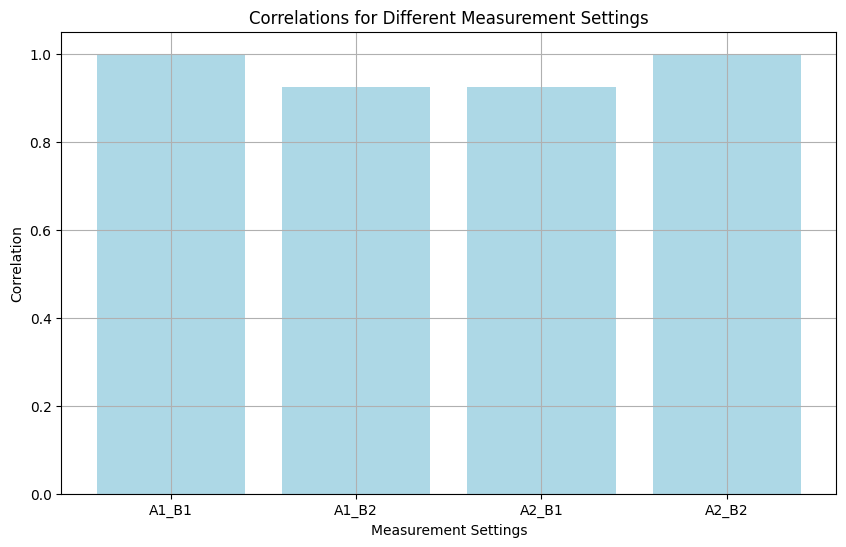

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def bell_state():
    """
    Generate the Bell state |Φ+⟩.
    """
    return np.array([1/np.sqrt(2), 0, 0, 1/np.sqrt(2)])

def measurement_operator(theta, phi):
    """
    Generate the measurement operator for a given angle.

    Args:
        theta (float): Angle for the measurement in radians.
        phi (float): Rotation angle around the z-axis in radians.

    Returns:
        np.array: Measurement operator.
    """
    return np.array([
        [np.cos(theta/2), -np.exp(1j*phi) * np.sin(theta/2)],
        [np.exp(1j*phi) * np.sin(theta/2), np.cos(theta/2)]
    ])

def correlation_measurement(state, theta_a, phi_a, theta_b, phi_b):
    """
    Compute the correlation ⟨A(θ_a, φ_a) B(θ_b, φ_b)⟩ for the Bell state.

    Args:
        state (np.array): The state vector.
        theta_a (float): Measurement angle for Alice in radians.
        phi_a (float): Measurement angle around the z-axis for Alice in radians.
        theta_b (float): Measurement angle for Bob in radians.
        phi_b (float): Measurement angle around the z-axis for Bob in radians.

    Returns:
        float: The correlation value.
    """
    A = measurement_operator(theta_a, phi_a)
    B = measurement_operator(theta_b, phi_b)

    M = np.kron(A, B)

    return np.real(np.dot(state.T.conj(), np.dot(M, state)))

def epr_correlations(state):
    """
    Compute correlations for different measurement settings.

    Args:
        state (np.array): The state vector.

    Returns:
        dict: Correlation values for different measurement settings.
    """
    settings = {
        "A1_B1": correlation_measurement(state, 0, 0, 0, 0),
        "A1_B2": correlation_measurement(state, 0, 0, np.pi/4, 0),
        "A2_B1": correlation_measurement(state, np.pi/4, 0, 0, 0),
        "A2_B2": correlation_measurement(state, np.pi/4, 0, np.pi/4, 0)
    }
    return settings

def plot_correlations(correlations):
    """
    Plot the correlations.

    Args:
        correlations (dict): Correlation values.
    """
    plt.figure(figsize=(10, 6))
    plt.bar(correlations.keys(), correlations.values(), color='lightblue')
    plt.xlabel('Measurement Settings')
    plt.ylabel('Correlation')
    plt.title('Correlations for Different Measurement Settings')
    plt.grid(True)
    plt.show()

def main():
    # Prepare the Bell state |Φ+⟩
    state = bell_state()

    # Compute correlations
    correlations = epr_correlations(state)

    print("Correlation Measurements:")
    for setting, value in correlations.items():
        print(f"{setting}: {value:.2f}")

    # Plot correlations
    plot_correlations(correlations)

if __name__ == "__main__":
    main()


CHSH quantity: 0.0


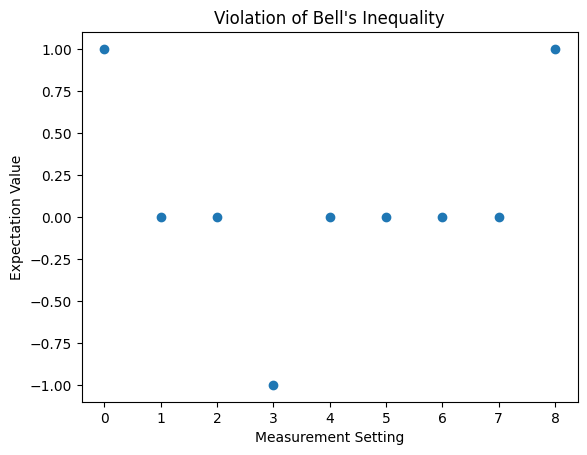

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the observables
A1 = np.array([[0, 1], [1, 0]])  # Pauli X matrix
A2 = np.array([[0, -1j], [1j, 0]])  # Pauli Y matrix
A3 = np.array([[1, 0], [0, -1]])  # Pauli Z matrix

B1 = np.array([[0, 1], [1, 0]])  # Pauli X matrix
B2 = np.array([[0, -1j], [1j, 0]])  # Pauli Y matrix
B3 = np.array([[1, 0], [0, -1]])  # Pauli Z matrix

# Define the measurement settings
settings = [(A1, B1), (A1, B2), (A2, B1), (A2, B2), (A3, B1), (A3, B2), (A1, B3), (A2, B3), (A3, B3)]

# Define the quantum state (Bell state)
state = np.array([1/np.sqrt(2), 0, 0, 1/np.sqrt(2)])

# Calculate the expectation values
expectations = []
for A, B in settings:
    # Compute the tensor product of A and B
    AB = np.kron(A, B)
    expectation = np.real(np.dot(state.conj(), np.dot(AB, state)))
    expectations.append(expectation)

# Calculate the CHSH quantity
S = expectations[0] + expectations[1] + expectations[2] + expectations[3] - expectations[4] - expectations[5] - expectations[6] - expectations[7]

print("CHSH quantity:", S)

# Plot the expectation values
plt.plot(range(9), expectations, 'o')
plt.xlabel("Measurement Setting")
plt.ylabel("Expectation Value")
plt.title("Violation of Bell's Inequality")
plt.show()

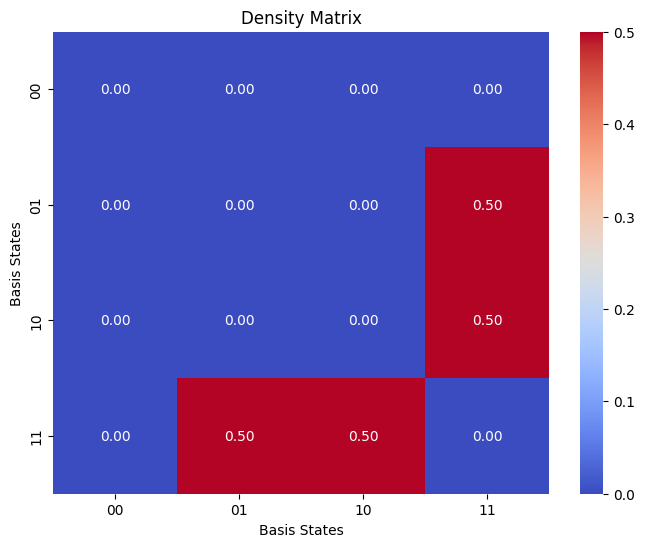

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define the density matrix for the Bell state |Psi+>
rho = np.array([[0, 0, 0, 0],
                [0, 0, 0, 0.5],
                [0, 0, 0, 0.5],
                [0, 0.5, 0.5, 0]])

# Create a heatmap to visualize the density matrix
plt.figure(figsize=(8, 6))
sns.heatmap(rho, annot=True, cmap='coolwarm', fmt='.2f', cbar=True,
            xticklabels=['00', '01', '10', '11'], yticklabels=['00', '01', '10', '11'])
plt.title('Density Matrix')
plt.xlabel('Basis States')
plt.ylabel('Basis States')
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the CHSH function
def chsh_expectation(theta_a, theta_b):
    return np.cos(theta_a - theta_b) - np.cos(theta_a + theta_b)




In [ ]:
# Function to calculate winning probability
def calculate_probability(theta_a0, theta_a1, theta_b0, theta_b1, shots=100000):
    winning_shots = 0
    for _ in range(shots):
        a = np.random.randint(2)
        b = np.random.randint(2)

        if a == 0:
            theta_a = theta_a0
        else:
            theta_a = theta_a1

        if b == 0:
            theta_b = theta_b0
        else:
            theta_b = theta_b1

        p0 = (1 + np.cos(theta_a - theta_b)) / 2
        p1 = 1 - p0
        outcome = np.random.choice([0, 1], p=[p0, p1])

        if outcome == ((a * b) % 2):
            winning_shots += 1

    return winning_shots / shots



In [ ]:
# Generate theta values
number_of_thetas = 100
theta_values = np.linspace(0, 2 * np.pi, number_of_thetas)

# Initialize arrays for expectation values and probabilities
expectation_values = []
probabilities = []

# Compute expectation values and probabilities for the CHSH inequality
for theta in theta_values:
    theta_a0 = 0
    theta_a1 = np.pi / 2
    theta_b0 = theta
    theta_b1 = theta + np.pi / 4  # Adjusted to optimize the CHSH value

    # Compute the CHSH expectation value
    S = (chsh_expectation(theta_a0, theta_b0) +
         chsh_expectation(theta_a0, theta_b1) +
         chsh_expectation(theta_a1, theta_b0) -
         chsh_expectation(theta_a1, theta_b1))

    expectation_values.append(S)

    # Calculate the winning probability
    prob = calculate_probability(theta_a0, theta_a1, theta_b0, theta_b1)
    probabilities.append(prob)

# Plot the results
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Theta (radians)')
ax1.set_ylabel('CHSH Expectation Value', color=color)
ax1.plot(theta_values, expectation_values, color=color, label='CHSH Expectation Value')
ax1.axhline(2, color='r', linestyle='--', label='Classical Bound')
ax1.axhline(2 * np.sqrt(2), color='g', linestyle='--', label='Quantum Bound')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('Winning Probability', color=color)
ax2.plot(theta_values, probabilities, color=color, label='Winning Probability')
ax2.axhline(0.80, color='purple', linestyle='--', label='Probability = 0.80')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('CHSH Expectation Values and Winning Probability')
plt.legend(loc='upper left')
plt.show()

KeyboardInterrupt: 